In [18]:
!pip install langgraph
!pip install python-dotenv langchain[groq]

In [19]:
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_KEY')

In [20]:
from langchain.chat_models import init_chat_model

model = init_chat_model("llama-3.1-8b-instant", model_provider="groq")

In [21]:
response = model.invoke("Hello, explain me CNN!")

In [22]:
response.content

"**Convolutional Neural Networks (CNNs)**\n\nConvolutional Neural Networks (CNNs) are a type of deep learning algorithm that is particularly well-suited for image and video classification tasks. They are inspired by the structure and function of the visual cortex in the human brain.\n\n**Key Components:**\n\n1. **Convolutional Layers**: These layers apply filters to small regions of the input data, known as receptive fields. The filters slide over the input data, computing a dot product at each position, and the result is a set of feature maps.\n2. **Activation Functions**: These functions are applied to the output of the convolutional layers to introduce non-linearity and enable the network to learn more complex patterns.\n3. **Pooling Layers**: These layers downsample the feature maps, reducing the spatial dimensions while retaining the most important information.\n4. **Flatten Layers**: These layers reshape the output of the pooling layers into a one-dimensional array, which is then

# LangChain

In [23]:

# --- Imports and Setup ---
import os
from google.colab import userdata
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Set API key
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_KEY')

# Initialize LLM model
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq")


# --- LangGraph Workflow Example ---

# Define node functions
def func1(inp: dict) -> dict:
    return {"result": inp["x"] + inp["y"]}

def func2(inp: dict) -> dict:
    return {"result": 2 * inp["result"]}

# Build workflow graph
workflow = StateGraph(dict)
workflow.add_node("add", func1)
workflow.add_node("double", func2)
workflow.add_edge("add", "double")
workflow.set_entry_point("add")
workflow.set_finish_point("double")

# Compile and run graph
app = workflow.compile()
print("LangGraph output:", app.invoke({"x": 10, "y": 5}))


# --- LangChain Chains and Prompts ---

# Prompt for travel destination
destination_prompt = ChatPromptTemplate.from_template(
    "Suggest me name of a place in one word to travel in {country} in month {month}"
)

# Destination chain
destination_chain = destination_prompt | model | StrOutputParser()
print("Suggested destination:", destination_chain.invoke(
    {"country": "India", "month": "December"}
))

# Prompt for travel itinerary
itinerary_prompt = ChatPromptTemplate.from_template(
    "Give me 3 days itinerary for the place {destination}"
)

# Composed chain: destination → itinerary
itinerary_chain = {"destination": destination_chain} | itinerary_prompt | model | StrOutputParser()
print("Itinerary:", itinerary_chain.invoke({"country": "India", "month": "June"}))


LangGraph output: {'result': 30}
Suggested destination: Considering the weather and festive atmosphere in India during December, I would suggest visiting 'MANALI'. 

Manali is a popular hill station in the state of Himachal Pradesh, known for its snow-capped mountains, lush forests, and serene rivers. In December, the weather is typically cold and snowy, making it an ideal destination for winter sports and activities like skiing, trekking, and ice skating. Additionally, the hill station offers a picturesque view of the snow-covered mountains and valleys, making it a perfect destination to escape the hustle and bustle of city life.
Itinerary: Munnar is a great choice for a June trip, given its cooler climate. Here's a suggested 3-day itinerary for your trip to Munnar:

**Day 1: Arrival and Exploration**

- **Morning**: Arrive at Cochin International Airport or Ernakulam Railway Station and take a taxi or bus to Munnar (approximately 4 hours).
- **10:00 AM**: Check-in at your hotel and f

# LangGraph

LangGraph result: {'result': 30}


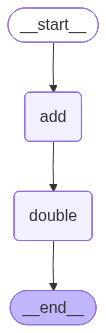

Suggested destination: One word suggestion for a place to travel in India in December is: 

**Shimla** 

Shimla is a popular hill station in the state of Himachal Pradesh. December is an ideal time to visit Shimla as the weather is cold and snowfall is common, making it a perfect destination for winter sports and a relaxing getaway.
Itinerary: Based on your preferences for a pleasant climate, relatively cooler temperatures, and scenic beauty, I recommend **Manali** as the best destination for a 3-day itinerary. Here's a suggested itinerary for you:

**Day 1:**

* Morning: Start your day with a visit to the **Hadimba Temple**, a wooden temple dedicated to the goddess Hadimba. Explore the surrounding forest and enjoy the peaceful atmosphere.
* Afternoon: Visit the **Manali Mall Road**, a bustling marketplace where you can shop for local handicrafts and try some delicious local cuisine.
* Evenings: Take a leisurely walk along the **Manali River** and enjoy the scenic views of the surround

In [24]:

# --- Imports and Setup ---
import os
from google.colab import userdata
from langchain.chat_models import init_chat_model
from langgraph.graph import StateGraph
from IPython.display import Image, display
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

# Set API key
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_KEY')

# Initialize model
model = init_chat_model("llama-3.1-8b-instant", model_provider="groq")


# --- LangGraph Section ---
def add_numbers(inp: dict) -> dict:
    """Adds two numbers from input dict."""
    return {"result": inp["x"] + inp["y"]}

def double_result(inp: dict) -> dict:
    """Doubles the previous result."""
    return {"result": 2 * inp["result"]}

# Build workflow
workflow = StateGraph(dict)
workflow.add_node("add", add_numbers)
workflow.add_node("double", double_result)
workflow.add_edge("add", "double")
workflow.set_entry_point("add")
workflow.set_finish_point("double")

# Compile and run graph
app = workflow.compile()
print("LangGraph result:", app.invoke({"x": 10, "y": 5}))

# Visualize graph (optional)
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    pass


# --- LangChain Section ---
# Prompt for travel destination
destination_prompt = ChatPromptTemplate.from_template(
    "Suggest me name of a place in one word to travel in {country} in month {month}"
)

# Chain for travel destination
destination_chain = destination_prompt | model | StrOutputParser()
destination = destination_chain.invoke({"country": "India", "month": "December"})
print("Suggested destination:", destination)

# Prompt for itinerary
itinerary_prompt = ChatPromptTemplate.from_template(
    "Give me 3 days itinerary for the place {destination}"
)

# Composed chain: destination → itinerary
itinerary_chain = {"destination": destination_chain} | itinerary_prompt | model | StrOutputParser()
itinerary = itinerary_chain.invoke({"country": "India", "month": "June"})
print("Itinerary:", itinerary)
